In [33]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer
)
import seaborn as sns
#Import nltk to check english lexicon
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import (
    wordnet,
    stopwords
)

In [10]:
# Authentication
consumer_key = 'WDuXFlFfkQCk0kttdI9Jn9V2Z'
consumer_secret = 'RbRTlMy8sj2HOu2mzJQjEuXQgmEgK7FLZmpXBguw5RaXUhOUbM'
access_token = '1125468211393249280-zc4jQZjyiWh38a3MwaBPf4vkSzul5M'
access_token_secret = 'OLwapp6J16LDEJOH8Tm6ZJNWOfhhfF7H8MmSNKqhuxKxt'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [11]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: cuba
Please enter how many tweets to analyze: 2000


In [12]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  223
negative number:  567
neutral number:  1210


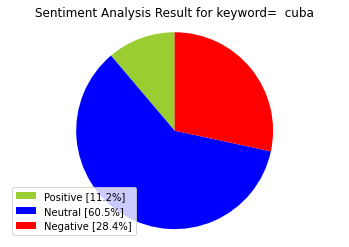

In [13]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [14]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@masteve @Vwms63 @realDailyWire Wow they shoul...,@masteve @Vwms63 @realDailyWire Wow they shoul...
1,RT @RP_OndaAlegria: ️Comienzan #HOY oficialmen...,RT @RP_OndaAlegria: ️Comienzan #HOY oficialmen...
2,RT @Csanchezberzain: En menos de una semana fa...,RT @Csanchezberzain: En menos de una semana fa...
3,RT @GdZOficial: Todos unidos en una sola voz p...,RT @GdZOficial: Todos unidos en una sola voz p...
4,@ajacobp @jeanrubiosoto @Mauricio5A @IndepXJad...,@ajacobp @jeanrubiosoto @Mauricio5A @IndepXJad...
...,...,...
1995,RT @CubaMINREX: Carta a Joseph Biden publicada...,RT @CubaMINREX: Carta a Joseph Biden publicada...
1996,EMBARCACIONES RUMBO A CUBA DESDE USA 🛥 ALAIN P...,EMBARCACIONES RUMBO A CUBA DESDE USA 🛥 ALAIN P...
1997,RT @cristiancrespoj: Así está muriendo la gent...,RT @cristiancrespoj: Así está muriendo la gent...
1998,"RT @DAVlDRomero: Dice Joe Biden que ""trabajará...","RT @DAVlDRomero: Dice Joe Biden que ""trabajará..."


In [15]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@masteve @Vwms63 @realDailyWire Wow they shoul...,wow they should have you and your vast i...
1,RT @RP_OndaAlegria: ️Comienzan #HOY oficialmen...,comienzan hoy oficialmente los juegos ol m...
2,RT @Csanchezberzain: En menos de una semana fa...,en menos de una semana fallece otro general d...
3,RT @GdZOficial: Todos unidos en una sola voz p...,todos unidos en una sola voz por la libertad ...
4,@ajacobp @jeanrubiosoto @Mauricio5A @IndepXJad...,d13 la violaci n de ddhh se da en todo...
5,RT @PerezBauta: «¡Vamos a ponerle corazón a la...,vamos a ponerle coraz n a la obra com n ...
6,"RT @Ulises17815792: Flotilla, mentiras, provoc...",flotilla mentiras provocaciones y muchas co...
7,RT @RosaMariaPaya: 9años del atentado\nMi espe...,9a os del atentado mi esperanza se estremece ...
8,RT @cgpenalva: Resumen de la entrevista de @sa...,resumen de la entrevista de en eeuu en la ...
9,RT @JMVivancoHRW: Los reportes que recibimos d...,los reportes que recibimos de cuba son desola...


In [16]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@masteve @Vwms63 @realDailyWire Wow they shoul...,wow they should have you and your vast i...,0.40,0.9,positive,0.000,0.616,0.384,0.8908
1,RT @RP_OndaAlegria: ️Comienzan #HOY oficialmen...,comienzan hoy oficialmente los juegos ol m...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
2,RT @Csanchezberzain: En menos de una semana fa...,en menos de una semana fallece otro general d...,0.05,0.5,negative,0.099,0.901,0.000,-0.2960
3,RT @GdZOficial: Todos unidos en una sola voz p...,todos unidos en una sola voz por la libertad ...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
4,@ajacobp @jeanrubiosoto @Mauricio5A @IndepXJad...,d13 la violaci n de ddhh se da en todo...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
5,RT @PerezBauta: «¡Vamos a ponerle corazón a la...,vamos a ponerle coraz n a la obra com n ...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
6,"RT @Ulises17815792: Flotilla, mentiras, provoc...",flotilla mentiras provocaciones y muchas co...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
7,RT @RosaMariaPaya: 9años del atentado\nMi espe...,9a os del atentado mi esperanza se estremece ...,0.00,0.0,positive,0.000,0.897,0.103,0.3400
8,RT @cgpenalva: Resumen de la entrevista de @sa...,resumen de la entrevista de en eeuu en la ...,0.00,0.0,negative,0.087,0.913,0.000,-0.2960
9,RT @JMVivancoHRW: Los reportes que recibimos d...,los reportes que recibimos de cuba son desola...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000


In [31]:
def stop_words(tw_list):
    #We need to remove the stop words
    stop_words_list = stopwords.words('english')
    tw_list['text'] = tw_list['text'].str.lower()
    tw_list['text'] = tw_list['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_list)]))
    return tw_list

In [34]:
tw_list = stop_words(tw_list)

In [35]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@masteve @Vwms63 @realDailyWire Wow they shoul...,wow vast incite running cuba front wise inform...,0.40,0.9,positive,0.000,0.616,0.384,0.8908
1,RT @RP_OndaAlegria: ️Comienzan #HOY oficialmen...,comienzan hoy oficialmente los juegos ol mpico...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
2,RT @Csanchezberzain: En menos de una semana fa...,en menos de una semana fallece otro general de...,0.05,0.5,negative,0.099,0.901,0.000,-0.2960
3,RT @GdZOficial: Todos unidos en una sola voz p...,todos unidos en una sola voz por la libertad d...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
4,@ajacobp @jeanrubiosoto @Mauricio5A @IndepXJad...,d13 la violaci n de ddhh se da en todos los si...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
1995,RT @CubaMINREX: Carta a Joseph Biden publicada...,carta joseph biden publicada en firmada por de...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
1996,EMBARCACIONES RUMBO A CUBA DESDE USA 🛥 ALAIN P...,embarcaciones rumbo cuba desde usa alain papar...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
1997,RT @cristiancrespoj: Así está muriendo la gent...,est muriendo la gente en los hospitales en cub...,0.00,0.0,negative,0.459,0.541,0.000,-0.9371
1998,"RT @DAVlDRomero: Dice Joe Biden que ""trabajará...",dice joe biden que trabajar con la oea para pr...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000


In [36]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [37]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [38]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,1181,59.05
negative,582,29.10
positive,237,11.85


In [20]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cubacloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [39]:
#putting everything in english - don't know why i didn't do that before
from langdetect import detect
tw_neg = tw_list_negative[tw_list_negative.text.apply(detect).eq('en')]

Word Cloud Saved Successfully


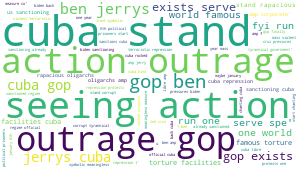

In [40]:
#Creating wordcloud for all tweets
create_wordcloud(tw_neg["text"].values)

In [41]:
tw_pos = tw_list_positive[tw_list_positive.text.apply(detect).eq('en')]

Word Cloud Saved Successfully


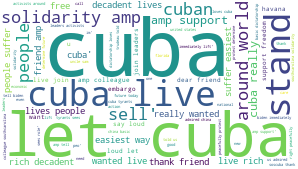

In [42]:
#Creating wordcloud for all tweets
create_wordcloud(tw_pos["text"].values)

In [43]:
#Vectorization for Data Visualization
def vectorization(tweets):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(tweets.text)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [44]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()

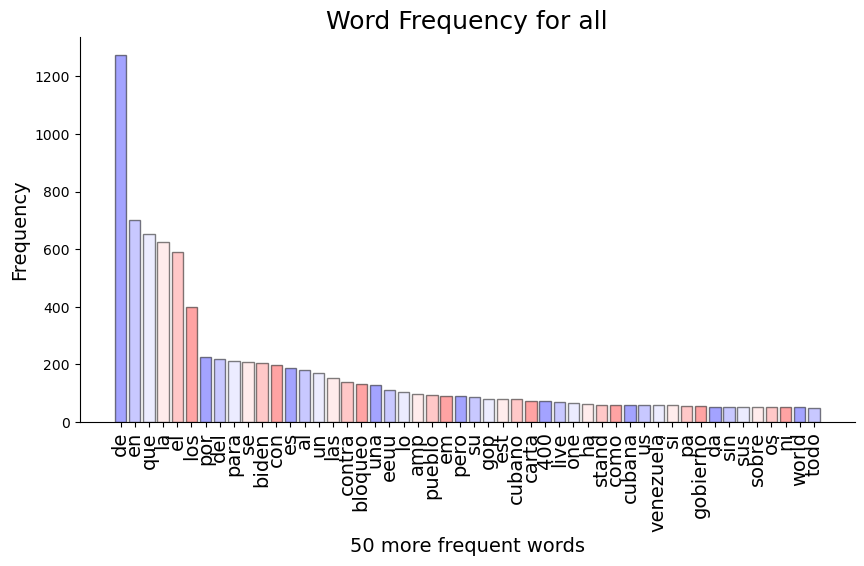

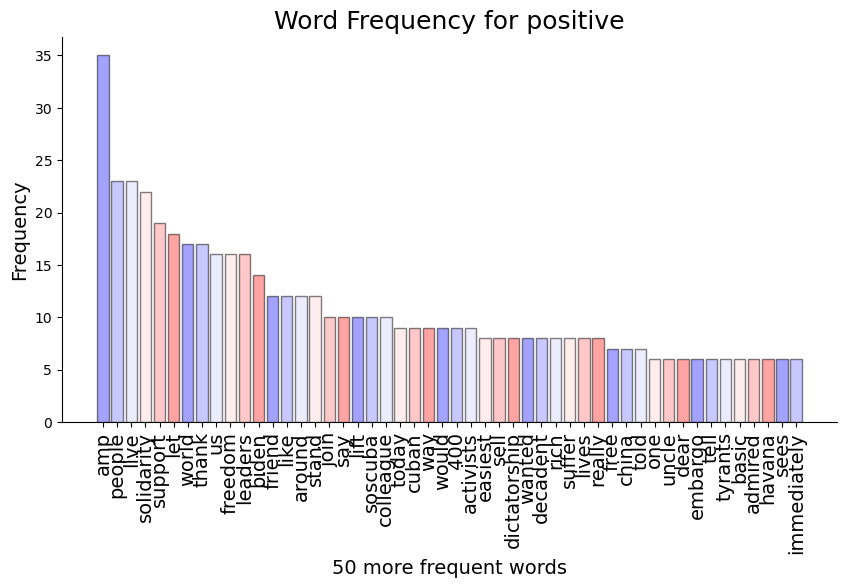

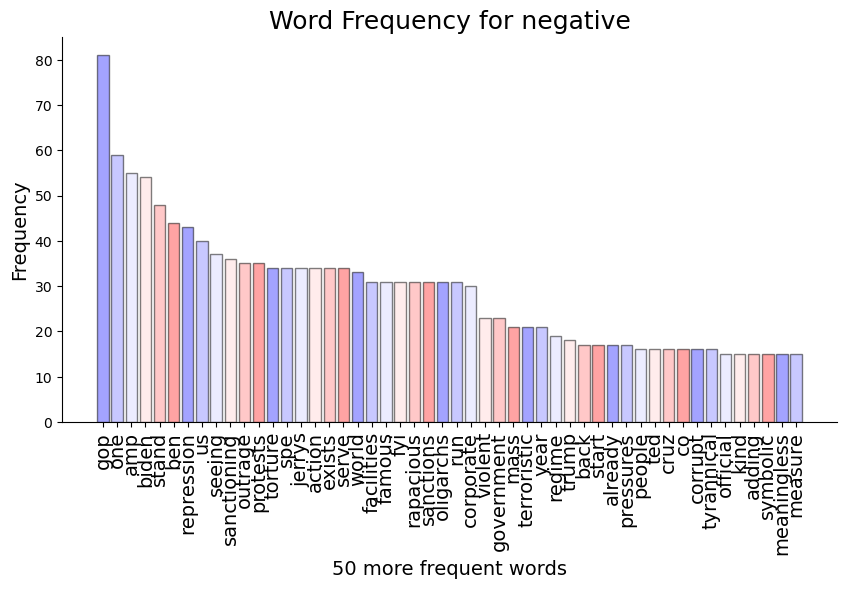

In [45]:
if __name__ == "__main__":
    #Get the frequency
    word_frequency = vectorization(tw_list).sort_values(0, ascending = False)
    word_frequency_pos = vectorization(tw_pos).sort_values(0, ascending = False)
    word_frequency_neg = vectorization(tw_neg).sort_values(0, ascending = False)

    #Graph with frequency words all, positive and negative tweets and get the frequency
    graph(word_frequency, 'all')
    graph(word_frequency_pos, 'positive')
    graph(word_frequency_neg, 'negative')

In [46]:
def regression_graph(table):
    table = table[1:]
    #We set the style of seaborn
    sns.set_style("whitegrid")   
    #Initialize the figure
    plt.figure(figsize=(6,6))
    
    #we obtain the points from matplotlib scatter
    points = plt.scatter(table["Positive"], table["Negative"], c=table["Positive"], s=75, cmap="bwr")
    #graph the colorbar
    plt.colorbar(points)
    #we graph the regplot from seaborn
    sns.regplot(x="Positive", y="Negative",fit_reg=False, scatter=False, color=".1", data=table)
    plt.xlabel("Frequency for Positive Tweets", size=14)
    plt.ylabel("Frequency for Negative Tweets", size=14)
    plt.title("Word frequency in Positive vs. Negative Tweets", size=14)
    plt.grid(False)
    sns.despine()

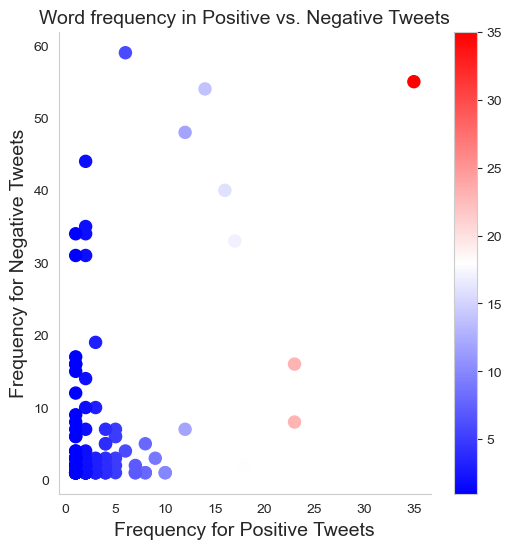

In [47]:
if __name__ == "__main__":
    #Concatenate word frequency for positive and negative
    table_regression = pd.concat([word_frequency_pos, word_frequency_neg], axis=1, sort=False)
    table_regression.columns = ["Positive", "Negative"]
    regression_graph(table_regression)